## Bank Customer Churn Prediction





In this project, I use supervised learning models to identify customers who are likely to churn in the future. Furthermore, I will analyze top factors that influence user retention.

# Contents

- [Part 1: Data Exploration](#part-1-data-exploration)
- [Part 2: Feature Preprocessing](#part-2-feature-preprocessing)
- [Part 3: Model Training and Result Evaluation](#part-3-model-training-and-result-evaluation)
- [Part 4: Feature Importance](#part-4-feature-importance)



# Part 0: Setup Google Drive Environment / Data Collection

In [ ]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# the same way we get id from last class
# https://drive.google.com/file/d/1U-Wf3AHgQpQKiwPb0z6kuCLe8hU4W3-S/view?usp=sharing

id = "1U-Wf3AHgQpQKiwPb0z6kuCLe8hU4W3-S"

file = drive.CreateFile({'id':id})
file.GetContentFile('bank.data.csv')

In [ ]:
import numpy as np
import pandas as pd

churn_df = pd.read_csv('bank.data.csv')
churn_df.head()
#Column Exited means whether churn or not

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<a name='part-1-data-exploration'></a>
# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [ ]:
# check data info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# check the unique values for each column
churn_df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [ ]:
# Get target variable
y = churn_df['Exited']


### Part 1.2:  Understand the features

In [ ]:
# check missing values
churn_df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# understand Numerical feature
# discrete/continuous
# 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts'
# 'Balance', 'EstimatedSalary'
churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()
#11.58 in column Estimated Salary might be misunderstood by people who fill out the survey

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

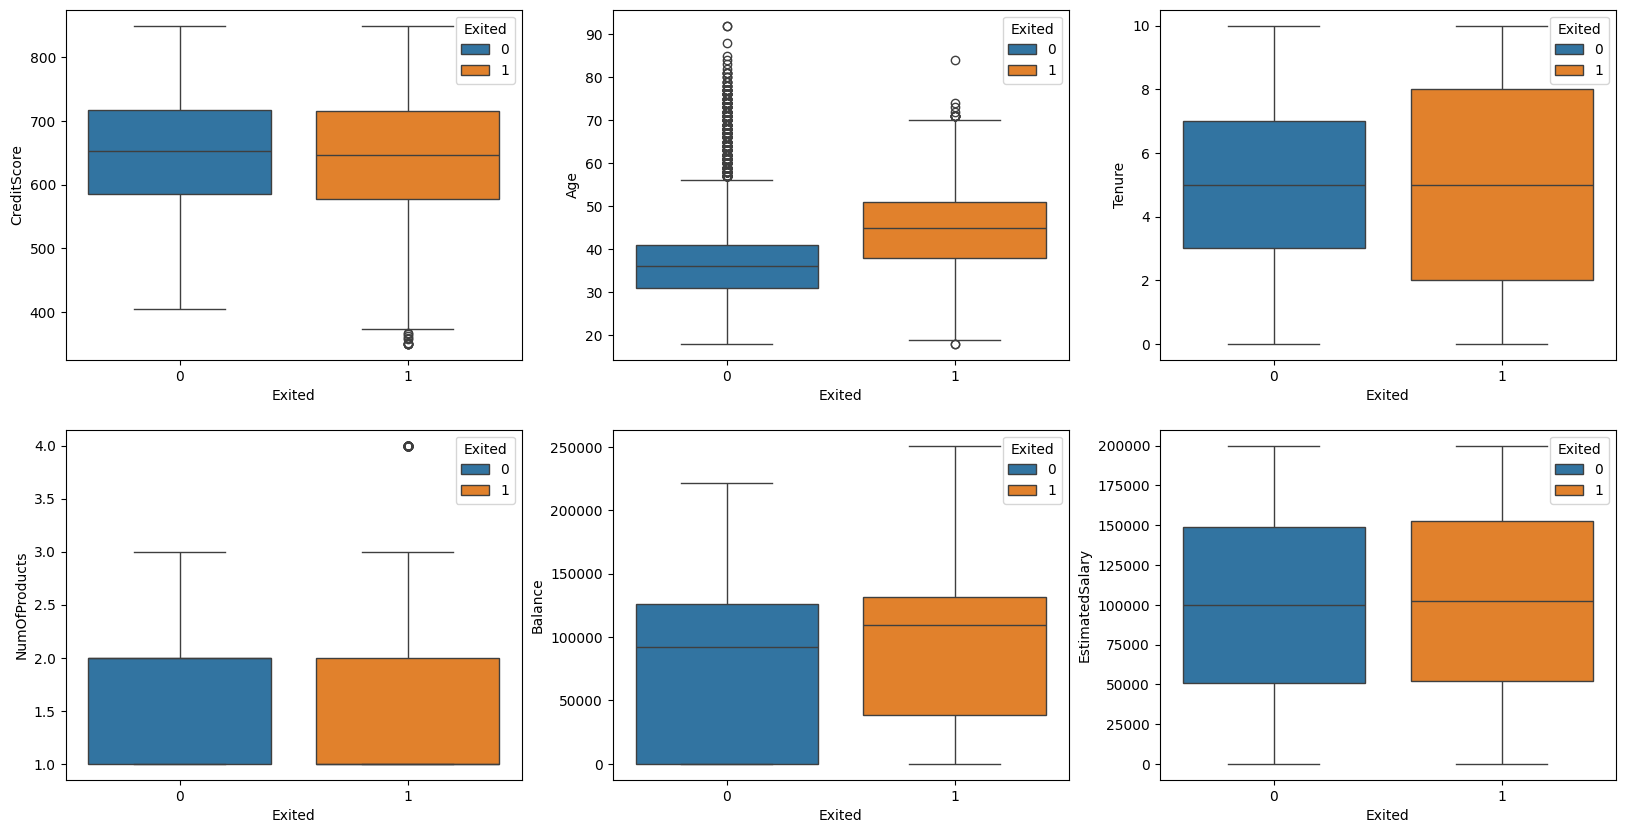

In [ ]:
# boxplot for numerical feature
fig,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0], hue='Exited')
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1], hue='Exited')
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2], hue='Exited')
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0], hue='Exited')
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1], hue='Exited')
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2], hue='Exited')

Credit Score: The credit scores of both exited and retained customers appear similar in range and distribution. However, there is a slight tendency for churned customers to have a lower median credit score, indicating that slightly lower credit scores might correlate with churn.

Age: Age is a significant factor. Customers who exited are generally older, with a higher median age compared to those who remained. This could suggest that older customers are more likely to churn.

Tenure: Tenure distribution is similar for both groups, indicating that the length of time a customer has been with the bank may not significantly impact churn.

Number of Products: The number of products held by customers is similar between both groups, suggesting that product count alone is not a major factor influencing churn.

Balance: Customers who exited tend to have a lower median balance compared to those who remained. However, the range is wide for both groups, indicating that balance is not a strong independent factor in predicting churn.

Estimated Salary: The distribution of estimated salaries is almost identical for both exited and retained customers, suggesting that salary is not a strong factor influencing churn in this dataset.

<Axes: xlabel='Exited', ylabel='count'>

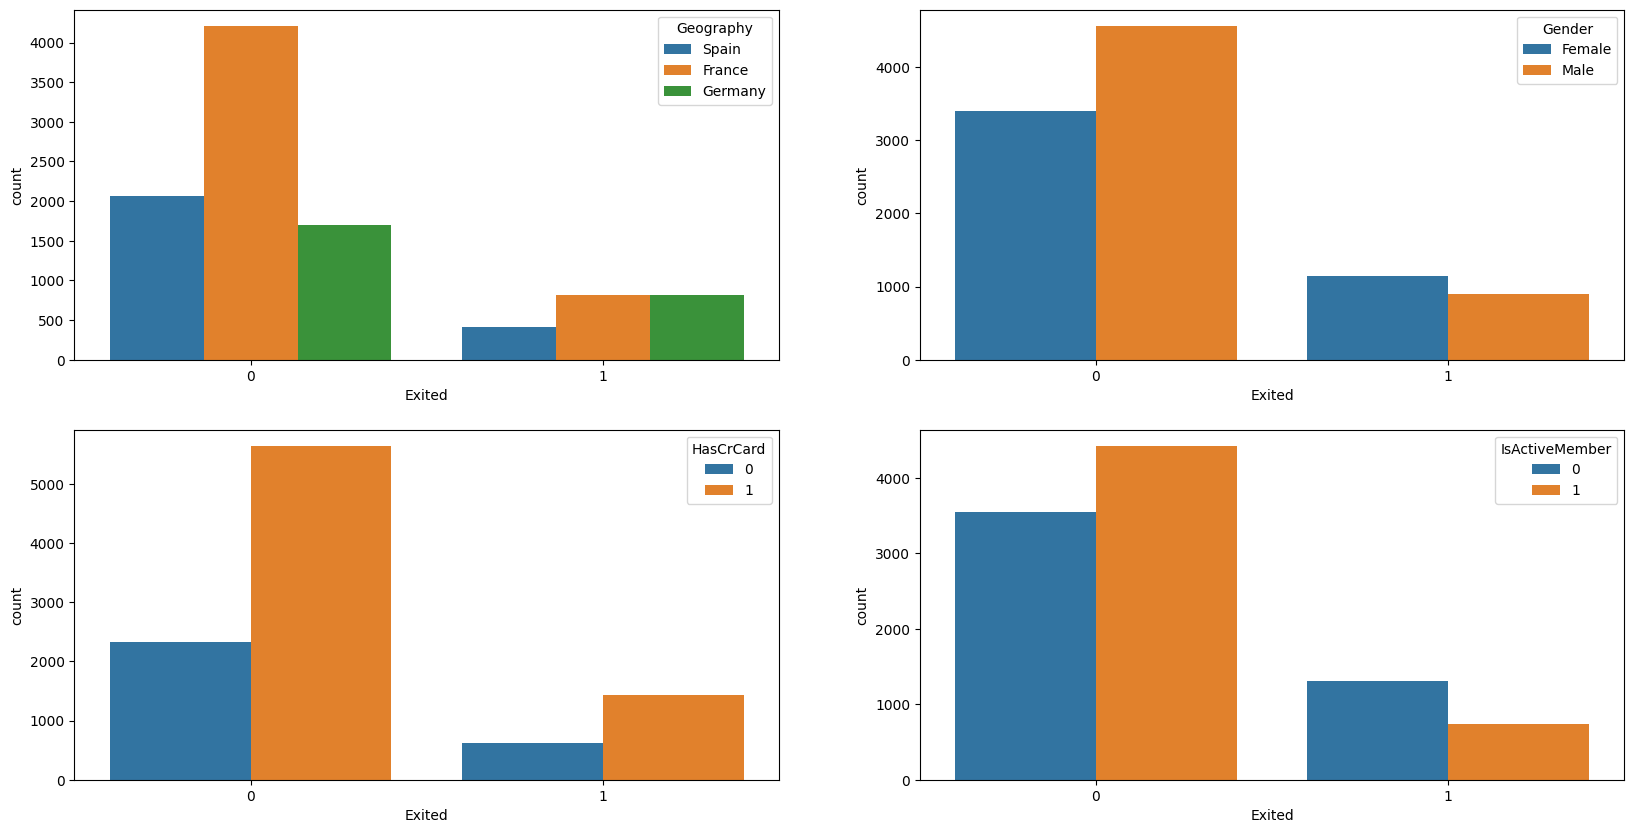

In [ ]:
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

Geography:
Customers from different regions have varied churn rates.
France has the highest number of retained customers, while Spain has the lowest.
Interestingly, Germany shows a higher number of churned customers relative to retained, suggesting that customers from Germany may be more likely to churn compared to those from other regions.

Gender:
Female customers have a higher churn rate compared to male customers, indicating that gender might play a role in churn behavior.
Retained customers have a higher proportion of males than females, while the churned group is more balanced between genders.

HasCrCard:
Most customers, whether churned or retained, have a credit card (1).
The churn rate does not appear to be significantly impacted by whether a customer has a credit card, as both churned and retained groups have similar proportions of credit card holders.

IsActiveMember:
This variable shows a clear difference between churned and retained customers.
A significantly larger proportion of active members (1) are retained, while inactive members (0) have a much higher churn rate.
This suggests that customer activity level is a strong indicator of churn, with inactive members being more prone to exit the bank.

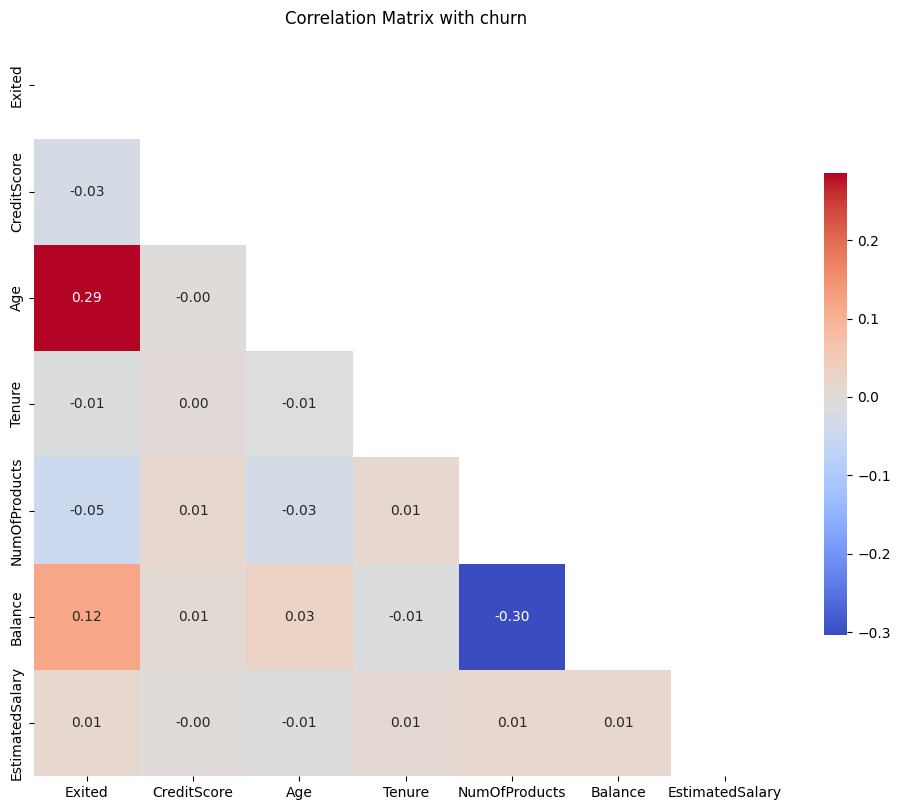

In [ ]:
plt.figure(figsize=(12, 12))
correlation_matrix = churn_df[['Exited','CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix with churn')
plt.show()

<a name='part-2-feature-preprocessing'></a>
# Part 2: Feature Preprocessing

In [ ]:
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop, axis = 1)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
X.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [ ]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [ ]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
cat_cols

Index(['Geography', 'Gender'], dtype='object')

Split dataset

In [ ]:
from sklearn import model_selection

# Reserve 25% for testing
# stratify example:
# 100 -> y: 80 '0', 20 '1' -> 4:1
# 80% training 64: '0', 16:'1' -> 4:1
# 20% testing  16:'0', 4: '1' -> 4:1
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state = 1)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features' )

training data has 7500 observation with 10 features
test data has 2500 observation with 10 features


In [ ]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7971,633,Spain,Male,42,10,0.00,1,0,1,79408.17
9152,708,Germany,Female,23,4,71433.08,1,1,0,103697.57
6732,548,France,Female,37,9,0.00,2,0,0,98029.58
902,645,France,Female,48,7,90612.34,1,1,1,149139.13
2996,729,Spain,Female,45,7,91091.06,2,1,0,71133.12


In [ ]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns = enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)


In [ ]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,Male,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,Female,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,Female,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,Female,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,Female,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [ ]:
# Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [ ]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,1.0,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,0.0,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,0.0,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,0.0,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,0.0,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


Standardize/Normalize Data

In [ ]:
# Scale the data, using standardization
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max-x_min) ->[0,1]

# 1. speed up gradient descent
# 2. same scale
# 3. algorithm requirments

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.172985,1.0,0.289202,1.731199,-1.218916,-0.912769,-1.542199,0.968496,-0.352044,0.0,0.0,1.0
1,0.602407,0.0,-1.509319,-0.341156,-0.076977,-0.912769,0.648425,-1.032529,0.072315,0.0,1.0,0.0
2,-1.051762,0.0,-0.184093,1.385806,-1.218916,0.796109,-1.542199,-1.032529,-0.026711,1.0,0.0,0.0
3,-0.048922,0.0,0.857156,0.695022,0.229625,-0.912769,0.648425,0.968496,0.866221,1.0,0.0,0.0
4,0.819517,0.0,0.573179,0.695022,0.237278,0.796109,0.648425,-1.032529,-0.496617,0.0,0.0,1.0


<a name='part-3-model-training-and-result-evaluation'></a>
# Part 3: Model Training and Result Evaluation

### Part 3.1: Model Training

#### Part3.1 Model Training: Build Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
classifier_logistic = LogisticRegression(random_state=1)

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier(random_state=1)

#### Part3.1.1: Model Training: Logistic Regression Accuracy

In [ ]:
# Train the model
classifier_logistic.fit(X_train, y_train)
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.808

#### Part3.1.2: Model Training: KNN Accuracy

In [ ]:
# Train the model
classifier_KNN.fit(X_train, y_train)
# Accuracy of test data
classifier_KNN.score(X_test, y_test)

0.8336

#### Part3.1.3 Model Training: Random Forest Accuracy

In [ ]:
# Train the model
classifier_RF.fit(X_train, y_train)
# Accuracy of test data
classifier_RF.score(X_test, y_test)

0.858

### Part 3.2: Use Grid Search to Find Optimal Hyperparameters

In [ ]:
#Loss/cost function --> (wx + b - y) ^2 + ƛ * |w| --> ƛ is a hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### Part 3.2.1: Find Optimal Hyperparameters - LogisticRegression

In [ ]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the 1/lambda value(weight) for L1 and L2
# solver: algorithm to find the weights that minimize the cost function

# ('l1', 0.01)('l1', 0.05) ('l1', 0.1) ('l1', 0.2)('l1', 1)
# ('12', 0.01)('l2', 0.05) ('l2', 0.1) ('l2', 0.2)('l2', 1)
parameters = {
    'penalty':('l2','l1'),
    'C':(0.01, 0.05, 0.1, 0.2, 1, 10, 100)
}

Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv = 5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1, 10, 100),
                         'penalty': ('l2', 'l1')})

In [ ]:
# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)

Best score: 0.8125333333333333
Best parameters set:
C:1
penalty:l1


In [ ]:
# best model
best_LR_model = Grid_LR.best_estimator_

In [ ]:
best_LR_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#accuracy
best_LR_model.score(X_test, y_test)

0.8092

In [ ]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
pivot_df = LR_models.pivot(index='param_C', columns='param_penalty', values='mean_test_score')
# Display the pivot table
print("Pivot Table of Mean Test Scores:")
print(pivot_df)
print(f"C for l1 is {pivot_df['l1'].idxmax()}")
print(f"C for l2 is {pivot_df['l2'].idxmax()}")

Pivot Table of Mean Test Scores:
param_penalty        l1        l2
param_C                          
0.01           0.799600  0.810800
0.05           0.810933  0.812267
0.10           0.812400  0.812267
0.20           0.812400  0.812000
1.00           0.812533  0.812400
10.00          0.812400  0.812400
100.00         0.812400  0.812400
C for l1 is 1.0
C for l2 is 1.0


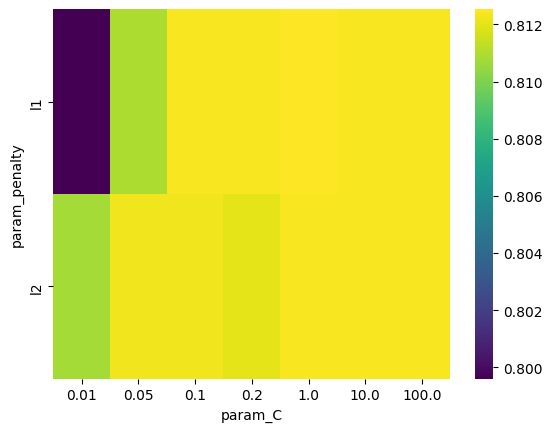

In [ ]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score'))
_ = sns.heatmap(res, cmap='viridis')

#### Part 3.2.2: Find Optimal Hyperparameters: KNN

In [ ]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [ ]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.8433333333333334
Best parameters set:
n_neighbors:9


In [ ]:
best_KNN_model = Grid_KNN.best_estimator_

In [ ]:
best_KNN_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
best_KNN_model.score(X_test, y_test)

0.8428

#### Part 3.2.3: Find Optimal Hyperparameters: Random Forest

In [ ]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [ ]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8652000000000001
Best parameters set:
max_depth:10
n_estimators:80


In [ ]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

In [ ]:
best_RF_model

RandomForestClassifier(max_depth=10, n_estimators=80)

In [ ]:
best_RF_model.score(X_test, y_test)

0.8616

####Part 3.3: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

class of interest as positive

TP: correctly labeled real churn

Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users.


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ("F1-Score is: " + str(2*(recall*precision)/(recall+precision)))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [ ]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)
confusion_matrices

Random Forest
Accuracy is: 0.8616
precision is: 0.8196078431372549
recall is: 0.4106090373280943
F1-Score is: 0.5471204188481675

Logistic Regression
Accuracy is: 0.8092
precision is: 0.5963855421686747
recall is: 0.1944990176817289
F1-Score is: 0.2933333333333334

K nearest neighbor
Accuracy is: 0.8428
precision is: 0.7283464566929134
recall is: 0.36345776031434185
F1-Score is: 0.48492791612057673



[('Random Forest',
  array([[1945,   46],
         [ 300,  209]])),
 ('Logistic Regression',
  array([[1924,   67],
         [ 410,   99]])),
 ('K nearest neighbor',
  array([[1922,   69],
         [ 324,  185]]))]

Random Forest:

Pros:
Highest accuracy (86%).
Good precision (80%), indicating that 80% of the predicted positives are correct.
Cons:
Moderate recall (41.65%), meaning it misses around 58.35% of actual positives.
F1-Score of 0.56 reflects a balance between precision and recall but indicates room for improvement, especially in recall.

Logistic Regression (LR):

Pros:
Decent accuracy (80.92%).
Moderate precision (59.64%).
Cons:
Very low recall (19.45%), indicating it misses about 80.55% of actual positives.
F1-Score of 0.28 suggests poor overall performance in balancing precision and recall.

K-Nearest Neighbors (KNN):

Pros:
High precision (72.83%), ensuring that most predicted positives are correct.
Better recall (36.35%) compared to LR but still low.
Cons:
Accuracy is slightly lower than RF (84.28%).
F1-Score of 0.47 indicates better performance than LR but not as good as RF.


In the context of bank churn prediction, the recall metric is particularly crucial because:

Recall Importance: High recall ensures that most customers who are likely to churn are identified. Missing these customers (false negatives) can lead to significant revenue loss.

Precision Consideration: While high precision is desirable to ensure that resources (e.g., retention efforts) are not wasted on customers unlikely to churn, recall often takes precedence to maximize retention.

Implications:

Random Forest offers a balance but still misses a significant portion of churners.

Logistic Regression performs poorly in identifying churners, making it less suitable for this task.

KNN provides better precision and recall than LR but still falls short of ideal performance.

### Part 3.4: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function

#### Part 3.4.1: ROC of RF Model

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [ ]:
best_RF_model.predict_proba(X_test)

array([[0.69263193, 0.30736807],
       [0.95144995, 0.04855005],
       [0.74113295, 0.25886705],
       ...,
       [0.87201826, 0.12798174],
       [0.92721448, 0.07278552],
       [0.89602221, 0.10397779]])

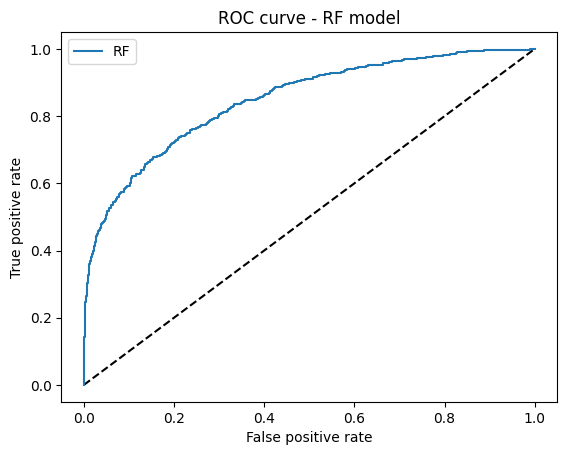

In [ ]:
# ROC curve of Random Forest result
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8475990681050978

#### Part 3.4.2: ROC of LR Model

In [ ]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

In [ ]:
best_LR_model.predict_proba(X_test)

array([[0.82437717, 0.17562283],
       [0.9317069 , 0.0682931 ],
       [0.85520705, 0.14479295],
       ...,
       [0.71452213, 0.28547787],
       [0.89279874, 0.10720126],
       [0.85560873, 0.14439127]])

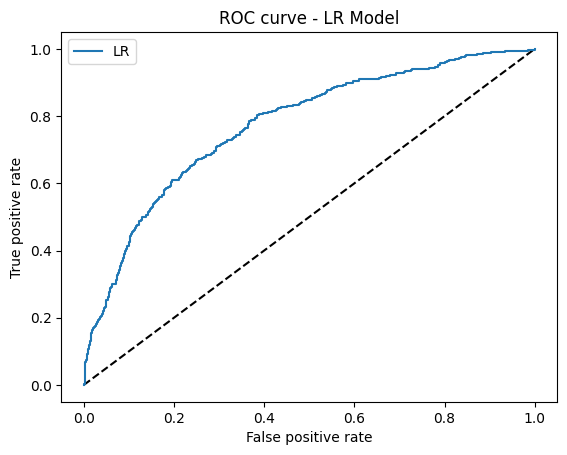

In [ ]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [ ]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7722018237274021

In [ ]:
y_pred_KNN = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_KNN, tpr_KNN, _ = roc_curve(y_test, y_pred_KNN)

In [ ]:
best_KNN_model.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.88888889, 0.11111111],
       ...,
       [0.77777778, 0.22222222],
       [1.        , 0.        ],
       [1.        , 0.        ]])

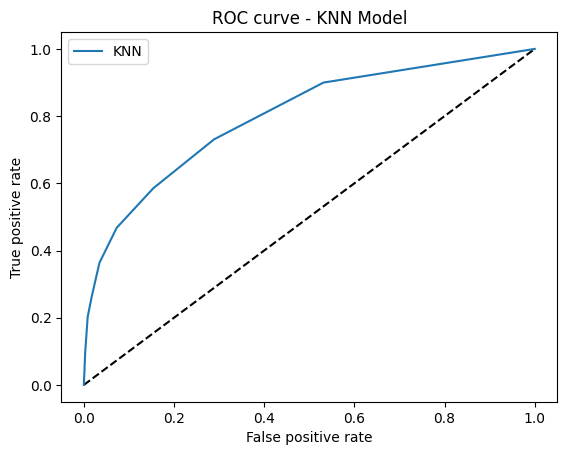

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_KNN, tpr_KNN, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

In [ ]:
# AUC score
metrics.auc(fpr_KNN,tpr_KNN)

0.7986385690420251

Random Forest	0.8455
This model is highly effective at distinguishing between customers who will churn and those who will remain. This high AUC suggests robust predictive power, which can help in accurately targeting retention efforts.

K-Nearest Neighbors (KNN)	0.7986
KNN performs reasonably well in identifying potential churner. While not as powerful as Random Forest, KNN can still be useful, especially if the customer base has clear clusters or segments where similar customers exhibit similar behaviors regarding churn.

Logistic Regression	0.7722
Logistic Regression shows a decent ability to predict churn, though it's the lowest among the three models. While simpler and more interpretable, it may miss complex non-linear patterns that contribute to churn.

### Part 3.5: K-Fold Cross Validation Check For Overfitting

#### Part 3.5.1: K-Fold Cross Validation Check for Overfitting: Logistic Regression

In [ ]:
from sklearn.model_selection import cross_validate

# Perform cross-validation
cv_results = cross_validate(classifier_logistic, X_train, y_train, cv=5, return_train_score=True)

# Extract training and validation scores
train_scores = cv_results['train_score']
val_scores = cv_results['test_score']

# Print training and validation accuracies for each fold
print("Training Scores for each fold:", train_scores)
print("Validation Scores for each fold:", val_scores)

# Calculate mean scores
mean_train_score = np.mean(train_scores)
mean_val_score = np.mean(val_scores)

print(f"Mean Training Accuracy: {mean_train_score:.4f}")
print(f"Mean Validation Accuracy:{mean_val_score:.4f}")


Training Scores for each fold: [0.81016667 0.81383333 0.81283333 0.81216667 0.80933333]
Validation Scores for each fold: [0.81933333 0.80666667 0.80666667 0.80933333 0.82      ]
Mean Training Accuracy: 0.8117
Mean Validation Accuracy:0.8124


#### Part 3.5.2 K-Fold Cross Validation Check for Overfitting: KNN

In [ ]:
# Perform cross-validation
cv_results = cross_validate(classifier_KNN, X_train, y_train, cv=5, return_train_score=True)

# Extract training and validation scores
train_scores = cv_results['train_score']
val_scores = cv_results['test_score']

# Print training and validation accuracies for each fold
print("Training Scores for each fold:", train_scores)
print("Validation Scores for each fold:", val_scores)

# Calculate mean scores
mean_train_score = np.mean(train_scores)
mean_val_score = np.mean(val_scores)

print(f"Mean Training Accuracy: {mean_train_score:.4f}")
print(f"Mean Validation Accuracy:{mean_val_score:.4f}")

Training Scores for each fold: [0.87533333 0.8755     0.88666667 0.88283333 0.87783333]
Validation Scores for each fold: [0.84133333 0.84066667 0.83       0.83066667 0.84      ]
Mean Training Accuracy: 0.8796
Mean Validation Accuracy:0.8365


#### Part 3.5.3 K-Fold Cross Validation Check for Overfitting: Random Forest

In [ ]:
# Perform cross-validation
cv_results = cross_validate(classifier_RF, X_train, y_train, cv=5, return_train_score=True)

# Extract training and validation scores
train_scores = cv_results['train_score']
val_scores = cv_results['test_score']

# Print training and validation accuracies for each fold
print("Training Scores for each fold:", train_scores)
print("Validation Scores for each fold:", val_scores)

# Calculate mean scores
mean_train_score = np.mean(train_scores)
mean_val_score = np.mean(val_scores)

print(f"Mean Training Accuracy: {mean_train_score:.4f}")
print(f"Mean Validation Accuracy:{mean_val_score:.4f}")

Training Scores for each fold: [1. 1. 1. 1. 1.]
Validation Scores for each fold: [0.878      0.86533333 0.85533333 0.85733333 0.85933333]
Mean Training Accuracy: 1.0000
Mean Validation Accuracy:0.8631


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(random_state=123)
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator
best_rf_model = grid_search.best_estimator_


train_accuracy = best_rf_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the test set
test_accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)





Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py"

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training Accuracy: 0.9134666666666666
Test Accuracy: 0.8596


<a name='part-4-feature-importance'></a>
# Part 4: Feature Importance

### Part 4.1:  Logistic Regression Model

In [ ]:
X_with_corr = X.copy()

X_with_corr = OneHotEncoding(X_with_corr, enc_ohe, ['Geography'])
X_with_corr['Gender'] = enc_oe.transform(X_with_corr[['Gender']])
X_with_corr.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [ ]:
# add L2 regularization to logistic regression
# check the coef for feature selection
# check multicolinearity if there are same coefficient
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
Age : 0.7613
IsActiveMember : -0.5364
Gender : -0.2627
Geography_Germany : 0.23
Balance : 0.1643
Geography_France : -0.1218
Geography_Spain : -0.0899
CreditScore : -0.0645
NumOfProducts : -0.059
Tenure : -0.046
EstimatedSalary : 0.0276
HasCrCard : -0.0203


In [ ]:
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 1, solver='liblinear')
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Age : 0.7612
IsActiveMember : -0.5361
Geography_Germany : 0.3202
Gender : -0.2622
Balance : 0.164
CreditScore : -0.0638
NumOfProducts : -0.0584
Tenure : -0.0453
EstimatedSalary : 0.0269
HasCrCard : -0.0196
Geography_France : -0.0171
Geography_Spain : 0.0


**Features with Positive Coefficients (Increase Churn Probability)**

Age: 0.7612

Interpretation: Older customers are more likely to churn. For each additional year in age, the log-odds of churn increase by approximately 0.7612.
Implication: Develop retention strategies targeting older demographics. Consider personalized services or benefits that cater to the preferences and needs of older customers.


Geography_Germany: 0.3202

Interpretation: Customers from Germany have a higher likelihood of churning compared to the baseline category (likely the omitted geography).
Implication: Investigate region-specific factors in Germany contributing to higher churn rates. Tailor regional strategies to address these issues, such as improving customer service or offering localized products.

Balance: 0.164

Interpretation: Higher account balances are associated with a greater probability of churn. Each unit increase in balance increases the log-odds of churn by 0.164.
Implication: Wealthier customers might be seeking better offers elsewhere. Introduce premium services, exclusive benefits, or tailored financial products to retain high-balance customers.

EstimatedSalary: 0.0269

Interpretation: Higher estimated salaries marginally increase the likelihood of churn. Each unit increase in estimated salary increases the log-odds of churn by 0.0269.
Implication: Although the effect is minimal, consider offering exclusive financial products or services to higher earners to prevent them from seeking better opportunities elsewhere.

**Features with Negative Coefficients (Decrease Churn Probability)**

CreditScore: -0.0638

Interpretation: Higher credit scores are linked to a slightly lower likelihood of churn. Each unit increase in credit score decreases the log-odds of churn by 0.0638.
Implication: Promote credit score improvement programs or financial advisory services to enhance customer loyalty among those with strong credit profiles.

Gender: -0.2622

Interpretation: One gender (Male) is less likely to churn. The negative coefficient indicates that being male decreases churn probability.
Implication: Analyze the specific needs and preferences of female with a higher churn rate. Develop targeted retention campaigns to address female concerns and enhance satisfaction.

IsActiveMember: -0.5361

Interpretation: Active members are less likely to churn. Being an active member decreases the log-odds of churn by 0.5361.
Implication: Encourage customer engagement through active membership benefits, loyalty programs, and regular interactions to enhance retention.

NumOfProducts: -0.0584

Interpretation: Customers with more products are less likely to churn. Each additional product decreases the log-odds of churn by 0.0584.
Implication: Encourage cross-selling and upselling of additional banking products. Bundle services to increase the number of products each customer holds, thereby enhancing their investment in the bank's ecosystem.

Tenure: -0.0453

Interpretation: Longer-tenured customers are slightly less likely to churn. Each additional year of tenure decreases the log-odds of churn by 0.0453.
Implication: Foster long-term relationships through loyalty programs, consistent customer satisfaction initiatives, and recognizing customer milestones (e.g., anniversaries).


HasCrCard: -0.0196

Interpretation: Customers with a credit card are marginally less likely to churn. Having a credit card decreases the log-odds of churn by 0.0196.
Implication: Promote credit card ownership by highlighting its benefits, thereby reducing churn among credit card holders.

**Features with Zero Coefficient**

Geography_Spain: 0.0

Interpretation: Geography_Spain has been eliminated by L1 regularization, indicating it does not contribute significantly to predicting churn in the presence of other features. Implication: This feature does not provide additional predictive value and can be excluded from the model.

### Part 4.2:  Random Forest Model

In [ ]:
X_RF = X.copy()

X_RF = OneHotEncoding(X_RF, enc_ohe, ['Geography'])
X_RF['Gender'] = enc_oe.transform(X_RF[['Gender']])

X_RF.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [ ]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier(random_state=123)
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X_RF.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))



Feature importance ranking by Random Forest Model:
Age : 0.2394
EstimatedSalary : 0.146
CreditScore : 0.1449
Balance : 0.1407
NumOfProducts : 0.1306
Tenure : 0.0818
IsActiveMember : 0.0402
Geography_Germany : 0.0207
HasCrCard : 0.0189
Gender : 0.0187
Geography_France : 0.0096
Geography_Spain : 0.0086


**Top Influential Features**

Age: 0.2394

Interpretation: Age is the most significant predictor of churn in your model. Older customers have a substantial influence on the likelihood of churn.
Implication:
Targeted Retention Strategies: Develop programs specifically catering to older customers, such as personalized financial planning, enhanced customer service, or senior-friendly banking products.
Lifecycle Marketing: Implement lifecycle marketing strategies that address the unique needs of customers as they age.

EstimatedSalary: 0.146

Interpretation: EstimatedSalary is the second most important feature. Customers with higher estimated salaries have a considerable impact on churn predictions.
Implication:
Premium Offerings: Introduce premium banking services, exclusive benefits, or higher interest rates for high-salary customers to enhance their satisfaction and loyalty.
Personalized Communication: Use salary data to tailor communication and offers that resonate with affluent customers.

CreditScore: 0.1449

Interpretation: CreditScore plays a vital role in predicting churn. Customers with higher credit scores are less likely to churn.
Implication:
Credit Score Improvement Programs: Offer financial advisory services to help customers improve their credit scores, thereby reducing churn likelihood.
Risk-Based Offers: Tailor offers based on credit scores, providing incentives for customers to maintain or improve their scores.


Balance: 0.1407

Interpretation: Balance is a significant predictor. Customers with higher account balances influence churn predictions notably.
Implication:
Retention Incentives: Provide incentives such as higher interest rates, balance-based rewards, or personalized financial products to customers with substantial balances.
Enhanced Services: Offer premium services or dedicated account managers to high-balance customers to increase their engagement and loyalty.

NumOfProducts: 0.1306

Interpretation: The Number of Products a customer holds is a strong indicator of churn. Customers utilizing more products are less likely to churn.
Implication:
Cross-Selling Strategies: Encourage customers to adopt additional banking products through bundled offers, discounts, or loyalty rewards.
Customer Education: Educate customers on the benefits of using multiple banking products to enhance their experience and dependency on the bank's services.

**Moderately Influential Features**

Tenure: 0.0818

Interpretation: Tenure, or the length of time a customer has been with the bank, moderately influences churn. Longer-tenured customers are slightly less likely to churn.
Implication:
Loyalty Programs: Implement loyalty programs that reward customers for their long-term association with the bank.
Milestone Celebrations: Celebrate customer anniversaries with the bank by offering special perks or recognition.

IsActiveMember: 0.0402

Interpretation: Being an Active Member has a minor positive impact on churn predictions. Active members are somewhat less likely to churn.
Implication:
Engagement Initiatives: Increase efforts to convert more customers into active members through engagement initiatives like regular communications, interactive services, and responsive customer support.
Activity-Based Rewards: Offer rewards based on account activity to incentivize customers to remain active.

**Least Influential Features**

Geography_Germany: 0.0207

Interpretation: Geography_Germany has a minimal positive impact on churn predictions, indicating that customers from Germany have a slightly higher churn likelihood.


Geography_France: 0.0096

Interpretation: Geography_France has a  very minimal positive impact on churn predictions, indicating that customers from France have a slightly higher churn likelihood.

Geography_Spain: 0.0086

Interpretation: Geography_France has a  very minimal positive impact on churn predictions, indicating that customers from France have a slightly higher churn likelihood.


Gender: 0.0187

Interpretation: Gender has a very slight positive influence on churn predictions. One gender may have a marginally higher churn probability.
Implication:
Demographic-Specific Campaigns: Explore the reasons behind gender-based churn differences and create targeted marketing or retention campaigns addressing the specific needs of the higher-churn gender.
Inclusive Services: Ensure that banking products and services cater to diverse customer needs across genders.

HasCrCard: 0.0189

Interpretation: HasCrCard has an almost negligible positive impact on churn predictions. Customers with a credit card show a slightly higher churn likelihood.
Implication:
Credit Card Benefits Enhancement: Enhance credit card offerings by adding more benefits, rewards, or exclusive services to increase their value proposition and reduce churn.
Credit Card Promotions: Promote credit card usage through special offers, cashback incentives, or lower interest rates to increase customer engagement.